## Density of States Plot  
  
This file creates the density of states plots for the methyl radical invesitgation. Data was extracted from the ORCA *.gbw file for the optimized geometries of the CF3 and CH3 radicals.  
The command `orca_2mkl` converted the *.gbw files into the proper *.molden input format required by the Multiwfn program. The Multiwfn program was then used to process the orbital density of states data plotted here. The degeneracy file was created manually by examination of the orbital energies. Energies that differed by less than 0.05 eV were combined.  

In [25]:
import pandas as pd
import numpy as np

# import the data -
# for whatever reason, the first two columns aren't parsed well (I believe they merge on some lines)
# this approach works, but it was a headache !OPTIMIZE AT OWN RISK!
CF3_alpha = np.genfromtxt("./CF3_opt_a_curve.txt", delimiter=[10] + [12]*11)
CF3_alpha2 = np.genfromtxt("./CF3_opt_a_curve.txt", delimiter=[12] + [12]*12)
CF3_alpha = pd.DataFrame(CF3_alpha)
CF3_alpha = CF3_alpha.iloc[:,:9]
CF3_alpha.columns = ["energy[eV]", "TDOS", "OPDOS", "C", "F", "C s", "C p", "F s", "F p"]
CF3_alpha['OPDOS'] = CF3_alpha2[:,3]

CF3_beta = np.genfromtxt("./CF3_opt_b_curve.txt", delimiter=[10] + [12]*12)
CF3_beta2 = np.genfromtxt("./CF3_opt_b_curve.txt", delimiter=[12] + [12]*12)
CF3_beta = pd.DataFrame(CF3_beta)
CF3_beta = CF3_beta.iloc[:,:9]
CF3_beta.columns = ["energy[eV]", "TDOS", "OPDOS", "C", "F", "C s", "C p", "F s", "F p"]
CF3_beta['OPDOS'] = CF3_beta2[:,3]


CH3_alpha = np.genfromtxt("./CH3_opt_a_curve.txt", delimiter=[10] + [12]*12)
CH3_alpha2 = np.genfromtxt("./CH3_opt_a_curve.txt", delimiter=[12] + [12]*12)
CH3_alpha = pd.DataFrame(CH3_alpha)
CH3_alpha = CH3_alpha.iloc[:,:8]
CH3_alpha.columns = ["energy[eV]", "TDOS", "OPDOS", "C", "H", "C s", "C p", "H s"]
CH3_alpha['OPDOS'] = CH3_alpha2[:,3]

CH3_beta = np.genfromtxt("./CH3_opt_b_curve.txt", delimiter=[10] + [12]*12)
CH3_beta2 = np.genfromtxt("./CH3_opt_b_curve.txt", delimiter=[12] + [12]*12)
CH3_beta = pd.DataFrame(CH3_beta)
CH3_beta = CH3_beta.iloc[:,:8]
CH3_beta.columns = ["energy[eV]", "TDOS", "OPDOS", "C", "H", "C s", "C p", "H s"]
CH3_beta['OPDOS'] = CH3_beta2[:,3]

# import the average orbital energies (can get from the *line.txt files, but degeneracy doesn't come with it)
dataframe = pd.read_csv("../summary_data.csv")
hartree_to_eV =27.211386245981
CF3_mos = dataframe[dataframe['filename'] == 'CF3_opt.out'].iloc[:,9:] / hartree_to_eV
CH3_mos = dataframe[dataframe['filename'] == 'CH3_opt.out'].iloc[:,9:] / hartree_to_eV 
CH3_mos.replace(0,np.nan, inplace=True)
CH3_mos = CH3_mos[np.logical_not(np.isnan(CH3_mos))]
CF3_somo_a = dataframe[dataframe['filename'] == 'CF3_opt.out']['somo-a_energy[hartree]'] / hartree_to_eV
CF3_somo_b = dataframe[dataframe['filename'] == 'CF3_opt.out']['somo-b_energy[hartree]'] / hartree_to_eV
CF3_homo_m4 = dataframe[dataframe['filename'] == 'CF3_opt.out']['homo-3_energy[hartree]'] / hartree_to_eV

# read the degeneracy data
degeneracy = pd.read_csv("./mo_degeneracy.csv")

C:\Users\isaac\AppData\Local\Temp\ipykernel_22384\2802463678.py:120: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:
C:\Users\isaac\AppData\Local\Temp\ipykernel_22384\2802463678.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


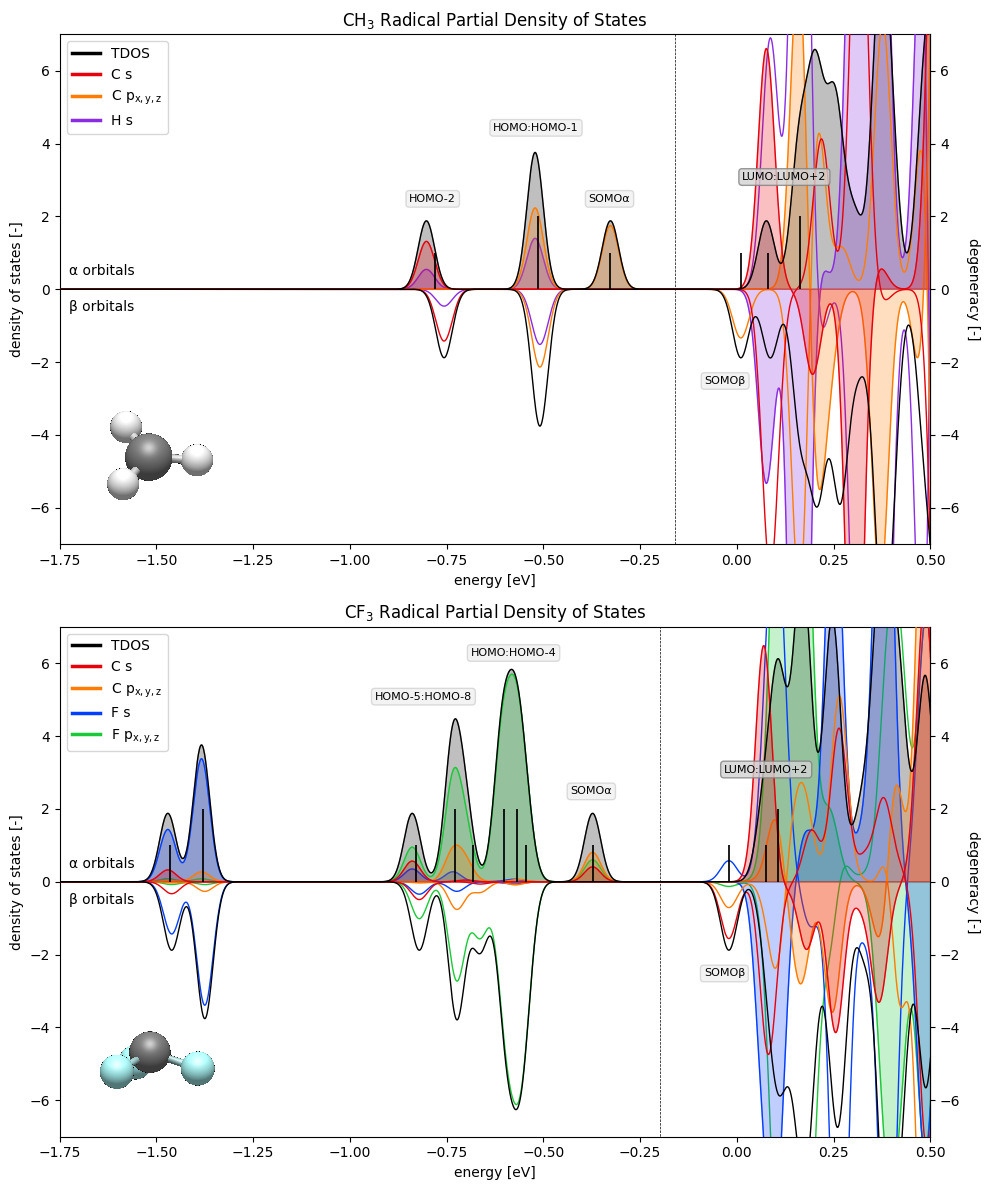

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as im
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

# set colors
blue = sns.color_palette("bright")[0]
orange = sns.color_palette("bright")[1]
green = sns.color_palette("bright")[2]
red = sns.color_palette("bright")[3]
purple = sns.color_palette("bright")[4]

fig, axes = plt.subplots(2,1, figsize=(10, 12))


# set plot parameters for CF3
CF3_cols = ["TDOS", "C s", "C p", "F s", "F p"]
CF3_labels = ["TDOS", "C s", "C p$_\mathrm{x,y,z}$", "F s", "F p$_\mathrm{x,y,z}$"]
CF3_line_colors = ["k", red, orange, blue, green]
CF3_fill_colors = ["k", red, orange, blue, green]
CF3_styles = ["solid", "solid", "solid", "solid", "solid"]
CF3_z_order_line = [10, 5, 4, 3, 2]
CF3_z_order_fill = [0, 5, 4, 3, 2]
CF3_text_pos = [(0.076, 3), (-0.032, -2.6), (-0.376, 2.4), (-0.577, 6.2), (-0.81,5)]
CF3_text = ["LUMO:LUMO+2", "SOMO\u03B2", "SOMO\u03B1", "HOMO:HOMO-4", "HOMO-5:HOMO-8"]
CF3_text_box_alpha = [0.8, 0.25, 0.25, 0.25, 0.25]

# plot curves 
for i, colname in enumerate(CF3_cols):
    axes[1].plot(CF3_alpha['energy[eV]'], CF3_alpha[colname], label=CF3_labels[i], color=CF3_line_colors[i], linestyle=CF3_styles[i], zorder = CF3_z_order_line[i], linewidth=1)
    axes[1].plot(CF3_beta['energy[eV]'], -CF3_beta[colname], color=CF3_line_colors[i], linestyle=CF3_styles[i], zorder = CF3_z_order_line[i], linewidth=1)
    axes[1].fill_between(CF3_beta['energy[eV]'], CF3_alpha[colname], np.zeros_like(CF3_alpha[colname]), color=CF3_fill_colors[i], alpha=0.25, zorder = CF3_z_order_fill[i])

# plot orbital labels 
for i, text in enumerate(CF3_text):
    t = axes[1].text(*CF3_text_pos[i], text, zorder=15, horizontalalignment="center", size=8)
    t.set_bbox(dict(facecolor='lightgray', alpha=CF3_text_box_alpha[i], edgecolor='gray', boxstyle='round'))

# annotate plot
axes[1].text(-1.725, 0.3, "\u03B1 orbitals", size=10, horizontalalignment='left', verticalalignment='bottom')
axes[1].text(-1.725, -0.3, "\u03B2 orbitals", size=10, horizontalalignment='left', verticalalignment='top')

axes[1].set_xlabel("energy [eV]")
axes[1].set_ylabel("density of states [-]")

def myfunc(y):
    return y
secax = axes[1].secondary_yaxis('right', functions=(myfunc, myfunc))
secax.set_ylabel("degeneracy [-]", rotation=-90, verticalalignment="bottom")

axes[1].vlines(-0.198, -8, 8, linestyle="dashed", linewidth = 0.5, color="k")

# --------------------------------------------------------------------------------

# set plot parameters for CH3
CH3_cols = ["TDOS", "C s", "C p", "H s"]
CH3_labels = ["TDOS", "C s", "C p$_\mathrm{x,y,z}$", "H s"]
CH3_line_colors = ["k", red, orange, purple]
CH3_fill_colors = ["k", red, orange, purple]
CH3_styles = ["solid", "solid", "solid", "solid"]
CH3_z_order_line = [10, 5, 4, 3]
CH3_z_order_fill = [0, 5, 4, 3]
CH3_text_pos = [(0.123, 3), (-0.03, -2.6), (-0.329, 2.4), (-0.519, 4.35), (-0.786, 2.4) ]
CH3_text = ["LUMO:LUMO+2", "SOMO\u03B2", "SOMO\u03B1", "HOMO:HOMO-1", "HOMO-2"]
CH3_text_box_alpha = [0.8, 0.25, 0.25, 0.25, 0.25]

# plot curves 
for i, colname in enumerate(CH3_cols):
    axes[0].plot(CH3_alpha['energy[eV]'], CH3_alpha[colname], label=CH3_labels[i], color=CH3_line_colors[i], linestyle=CH3_styles[i], zorder = CH3_z_order_line[i], linewidth=1)
    axes[0].plot(CH3_beta['energy[eV]'], -CH3_beta[colname], color=CH3_line_colors[i], linestyle=CH3_styles[i], zorder = CH3_z_order_line[i], linewidth=1)
    axes[0].fill_between(CH3_beta['energy[eV]'], CH3_alpha[colname], np.zeros_like(CH3_alpha[colname]), color=CH3_fill_colors[i], alpha=0.25, zorder = CH3_z_order_fill[i])

# plot orbital labels 
for i, text in enumerate(CH3_text):
    t = axes[0].text(*CH3_text_pos[i], text, zorder=15, horizontalalignment="center", size=8)
    t.set_bbox(dict(facecolor='lightgray', alpha=CH3_text_box_alpha[i], edgecolor='gray', boxstyle='round'))

# annotate plot
axes[0].text(-1.725, 0.3, "\u03B1 orbitals", size=10, horizontalalignment='left', verticalalignment='bottom')
axes[0].text(-1.725, -0.3, "\u03B2 orbitals", size=10, horizontalalignment='left', verticalalignment='top')

axes[0].set_xlabel("energy [eV]")
axes[0].set_ylabel("density of states [-]")

def myfunc(y):
    return y
secax = axes[0].secondary_yaxis('right', functions=(myfunc, myfunc))
secax.set_ylabel("degeneracy [-]", rotation=-90, verticalalignment="bottom")

axes[0].vlines(-0.1593, -8, 8, linestyle="dashed", linewidth = 0.5, color="k")


# adding degeneracy lines

for row in range(degeneracy.shape[0]):
    if degeneracy["heteroatom"][row] == "F":
        axes[1].vlines(degeneracy["energy[hartree]"][row]/27.2114, 0, degeneracy["degeneracy"][row], color="k", linewidth=1.25, zorder=10)
    else:
        axes[0].vlines(degeneracy["energy[hartree]"][row]/27.2114, 0, degeneracy["degeneracy"][row], color="k", linewidth=1.25, zorder=10)



# adding orbital images
CH3_image = im.imread("./CH3_opt_DOS_plot.png")
CF3_image = im.imread("./CF3_opt_DOS_plot.png")
image_pos = [(-1.5,-4.6), (-1.5,-4.9)]
for i, image in enumerate([CH3_image, CF3_image]):
    imagebox = OffsetImage(image, zoom= 0.08)
    ab = AnnotationBbox(imagebox, image_pos[i], frameon=False)
    axes[i].add_artist(ab)


axes[0].title.set_text("CH$_\mathrm{3}$ Radical Partial Density of States")
axes[1].title.set_text("CF$_\mathrm{3}$ Radical Partial Density of States")
for ax in axes:
    ax.set_ylim(-7,7)
    ax.set_xlim(-1.75,0.5)
    leg = ax.legend()
    # set the linewidth of each legend object
    for legobj in leg.legendHandles:
        legobj.set_linewidth(2.5)

plt.tight_layout()
fig.show()

In [36]:
fig.savefig("DOS_plot.png", dpi=600)